In [16]:
predict_dict = {
    '0': [],
    '1': [],
    '2': [],
    '3': [],
    '4': [],
    '5': [],
    '6': [],
    '7': [],
    '8': [],
    '9': [],
    'B': [],
    'D': [],
    'F': [],
    'G': [],
    'H': [],
    'J': [],
    'K': [],
    'L': [],
    'N': [],
    'P': [],
    'R': [],
    'S': [],
    'T': [],
    'V': [],
    'W': [],
    'X': [],
    'Z': []
}

file = 'out.txt'

with open(file, 'r') as f:
    for line in f:
        line = line.strip().split(', ')
        actual_plate = line[0]
        predicted_plate = line[1]
        # only continue if two '-' are at same position in both plates
        if actual_plate[1] == '-' and actual_plate[5] == '-' and predicted_plate[1] == '-' and predicted_plate[5] == '-':
            # print(actual_plate, predicted_plate)
            for i in range(7):
                if actual_plate[i] != predicted_plate[i]:
                    predict_dict[actual_plate[i]].append(predicted_plate[i])

        if actual_plate[2] == '-' and actual_plate[5] == '-' and predicted_plate[2] == '-' and predicted_plate[5] == '-':
            # print(actual_plate, predicted_plate)
            for i in range(7):
                if actual_plate[i] != predicted_plate[i]:
                    predict_dict[actual_plate[i]].append(predicted_plate[i])



print(predict_dict)



{'0': ['D', 'N', 'D', 'D', 'D', 'B'], '1': ['X', 'Z', 'Z', 'T', 'O', 'X', 'T', 'X', 'Z'], '2': ['7', 'B', '7'], '3': ['Z', '0', 'B', '9'], '4': ['N', '1', 'N', '1', 'N', 'N', 'L', '1'], '5': ['1'], '6': ['F', '5', 'G', 'G'], '7': ['H', '1', 'N', 'Z', 'Z', 'Z', '5'], '8': ['B', 'B', 'B', 'N', 'B', 'B', 'B', 'B', 'B', '1', 'B', 'L', 'B'], '9': ['H', '5', '1', '3'], 'B': ['D'], 'D': ['N', '1', 'B', '5'], 'F': ['T', 'P', 'R', '5', '5'], 'G': ['Z', 'F', 'F'], 'H': ['B', 'B', 'B', 'B'], 'J': ['X', 'P', '5'], 'K': ['W', 'W'], 'L': ['7', 'V', 'Z', 'Z', '9'], 'N': ['W', 'W'], 'P': ['B', 'N', '9', '9'], 'R': ['K', 'W', 'B', 'P'], 'S': ['N'], 'T': ['F', 'K', '1', '1', '1', 'F', 'F', '7', '1', 'F'], 'V': ['H', 'N', 'N', 'N', 'H', 'N', 'H', 'H', 'D', 'H'], 'W': [], 'X': ['5', 'Z', 'T'], 'Z': ['T', 'T', 'D']}


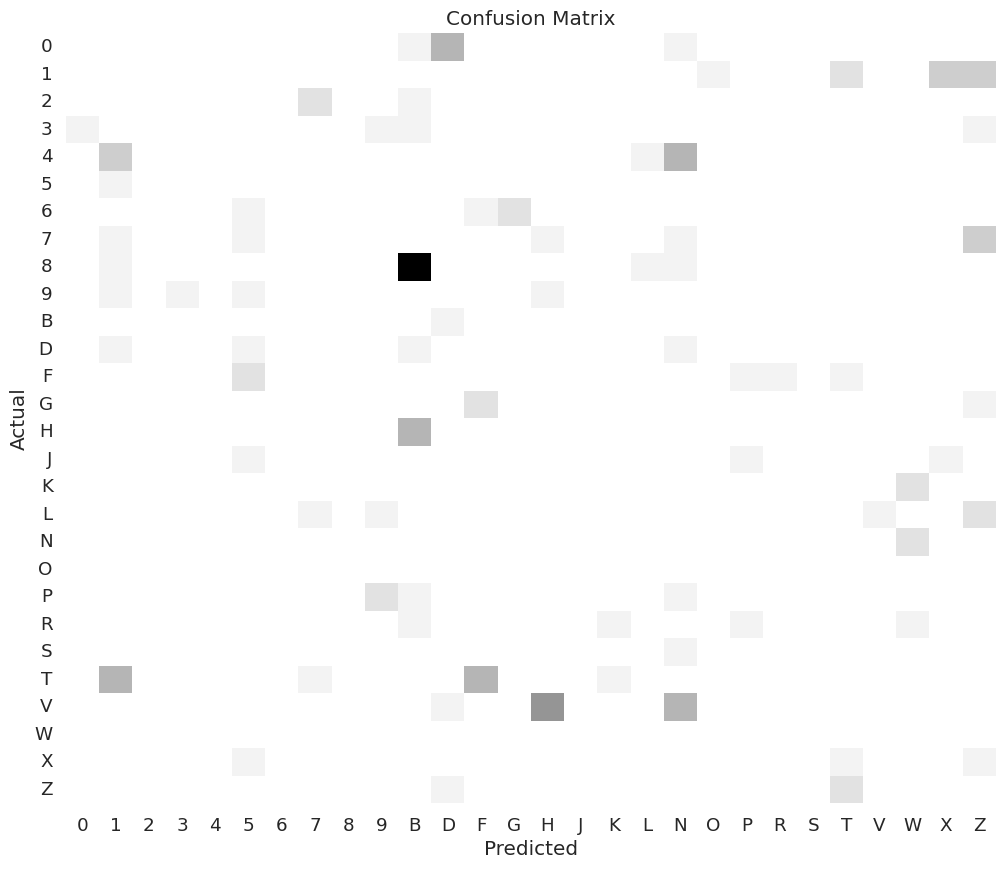

In [26]:
# Get unique classes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

data = predict_dict
# Get unique classes
classes = sorted(set(data.keys()).union(*data.values()))

# Initialize confusion matrix with zeros
confusion_matrix = pd.DataFrame(0, index=classes, columns=classes)

# Populate the confusion matrix
for actual, predictions in data.items():
    for predicted in predictions:
        confusion_matrix.loc[actual, predicted] += 1

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix, annot=False, fmt='d', cmap='Greys', cbar=False)

# Remove the numbers on the x-axis top
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()